<a href="https://colab.research.google.com/github/dorrabennour/Deep-learning-experimentations/blob/main/TP5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 1 : Simplification du vocabulaire

In [ ]:
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [ ]:
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np

filename = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/flickr_8k_train_dataset.txt'
#filename ='/content/flickr_8k_train_dataset .txt'
df = pd.read_csv(filename, delimiter='\t')
nb_samples = df.shape[0]
iter = df.iterrows()

bow = {}

nbwords = 0

for i in range(nb_samples):
 x = iter.__next__()
 cap_words = x[1][1].split() # split caption into words
 cap_wordsl = [w.lower() for w in cap_words] # remove capital letters
 nbwords += len(cap_wordsl)
 for w in cap_wordsl:
  if (w in bow):
   bow[w] = bow[w]+1
  else:
   bow[w] = 1

bown = sorted([(value,key) for (key,value) in bow.items()], reverse=True)

In [ ]:
nbkeep = 1000

In [ ]:
 # 100 is needed for fast processing

outfile = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/Caption_Embeddings.p'
#outfile = 'Caption_Embeddings.p'
[listwords, embeddings] = pickle.load( open( outfile, "rb" ) )

embeddings_new = np.zeros((nbkeep,102))
listwords_new = []

for i in range(nbkeep):
  listwords_new.append(bown[i][1])
  embeddings_new[i,:] = embeddings[i,:] # COMPLETE WITH YOUR CODE
  embeddings_new[i,:] /= np.linalg.norm(embeddings_new[i,:]) # Normalization


listwords = listwords_new
embeddings = embeddings_new
outfile = "Caption_Embeddings_"+str(nbkeep)+".p"
with open(outfile, "wb" ) as pickle_f:
  pickle.dump( [listwords, embeddings], pickle_f)

In [ ]:
# outfile = 'Caption_Embeddings.p'
# [listwords, embeddings] = pickle.load( open( outfile, "rb" ) )

In [ ]:
# embeddings.shape

number of kept words=1000 - ratio=94.2358763006284 %


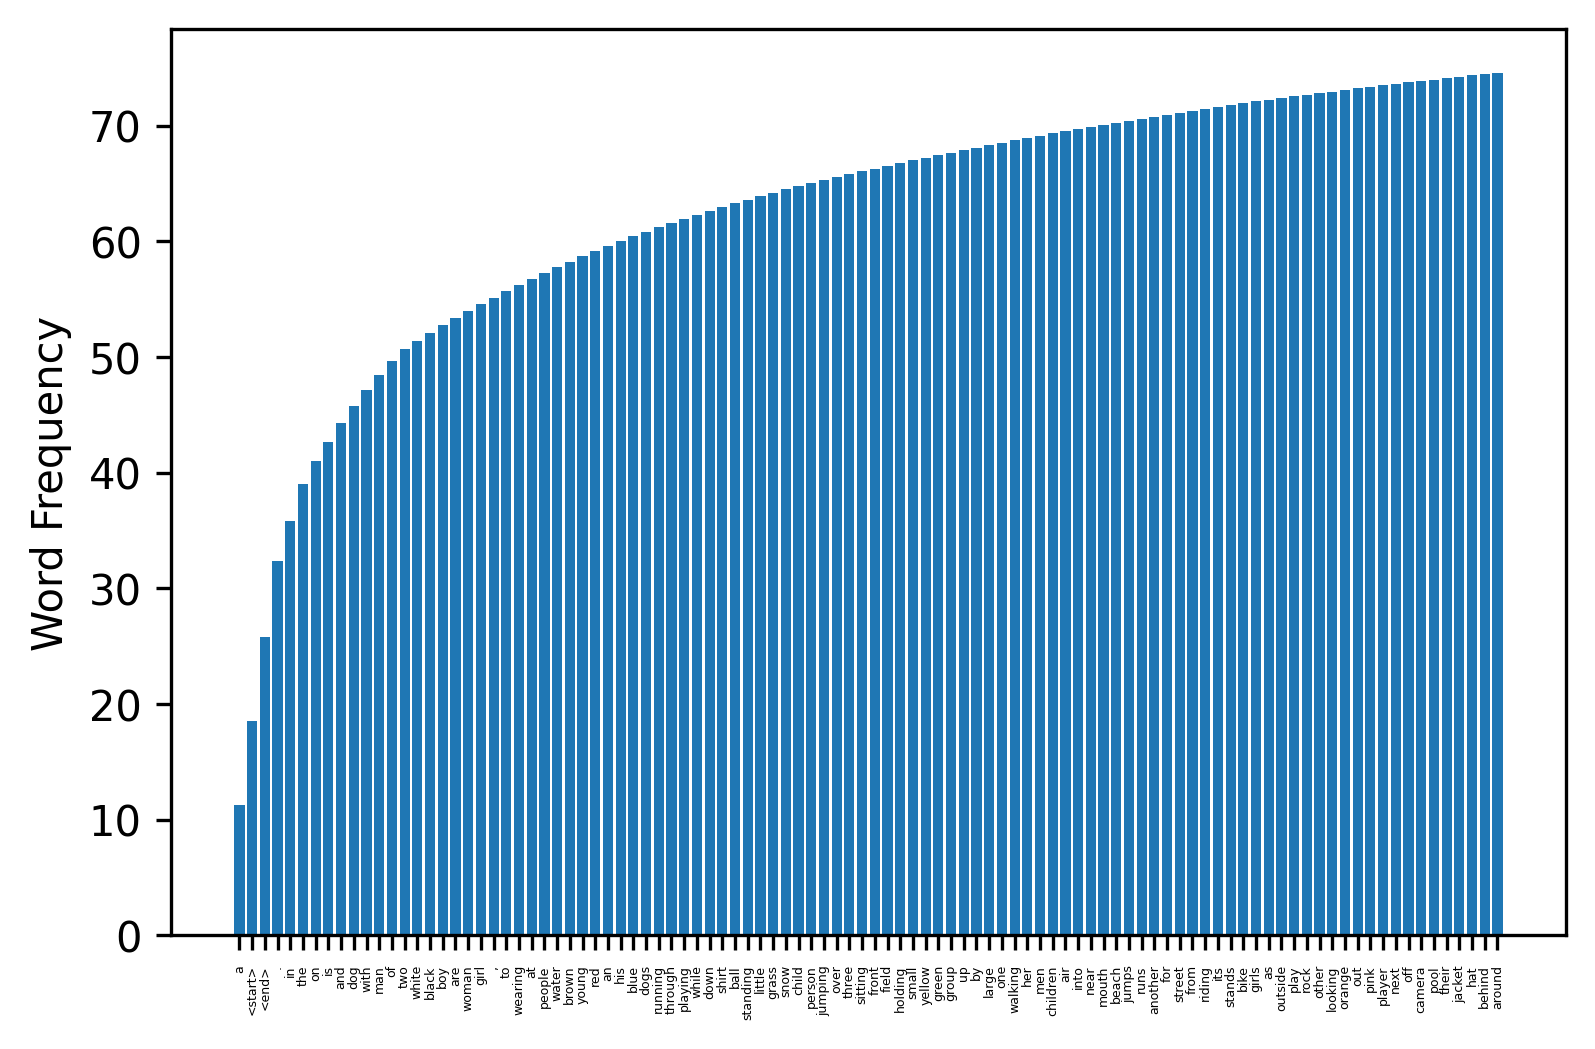

In [ ]:
freqnc = np.cumsum([float(w[0])/nbwords*100.0 for w in bown])

x_axis = [str(bown[i][1]) for i in range(100)]
plt.figure(dpi=300)
plt.xticks(rotation=90, fontsize=3)
plt.ylabel('Word Frequency')
plt.bar(x_axis, freqnc[0:100])

print("number of kept words="+str(nbkeep)+" - ratio="+str(freqnc[nbkeep-1])+" %")

# Exercice 2 : Création des données d’apprentissage et de test

In [ ]:
filename = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/flickr_8k_train_dataset.txt'
#filename = '/content/flickr_8k_train_dataset .txt'
df = pd.read_csv(filename, delimiter='\t')
nbTrain = df.shape[0]
iter = df.iterrows()

caps = [] # Set of captions
imgs = [] # Set of images
for i in range(nbTrain):
 x = iter.__next__()
 caps.append(x[1][1])
 imgs.append(x[1][0])

maxLCap = 0

for caption in caps:
   l=0
   words_in_caption =  caption.split()
   for j in range(len(words_in_caption)-1):
    current_w = words_in_caption[j].lower()
    if(current_w in listwords):
     l+=1
   if(l > maxLCap):
       maxLCap = l

print("max caption length ="+str(maxLCap))

max caption length =35


In [ ]:
#Train_data
outfile = "Caption_Embeddings_"+str(nbkeep)+".p"
[listwords, embeddings] = pickle.load( open( outfile, "rb" ) ) # Loading reduced dictionary
indexwords = {} # Useful for tensor filling
for i in range(len(listwords)):
 indexwords[listwords[i]] = i

# Loading images features
encoded_images =pickle.load( open( "/content/gdrive/Shareddrives/TRIED/TPs_DL/files/encoded_images_PCA.p", "rb" ) )

# Allocating data and labels tensors
tinput = 202
tVocabulary = len(listwords)
X_train = np.zeros((nbTrain,maxLCap, tinput))
Y_train = np.zeros((nbTrain,maxLCap, tVocabulary), bool)

for i in range(nbTrain):
 words_in_caption =  caps[i].split()
 indseq=0 # current sequence index (to handle mising words in reduced dictionary)
 for j in range(len(words_in_caption)-1):
  current_w = words_in_caption[j].lower()
  if(current_w in listwords):
   X_train[i,indseq,0:100] =encoded_images[imgs[i]] # COMPLETE WITH YOUR CODE
   X_train[i,indseq,100:202] =embeddings[indexwords[current_w],:] # COMPLETE WITH YOUR CODE

  next_w = words_in_caption[j+1].lower()
  if(next_w in listwords):
   index_pred = indexwords[next_w] # COMPLETE WITH YOUR CODE
   Y_train[i,indseq,index_pred] =True # COMPLETE WITH YOUR CODE
   indseq += 1 # Increment index if target label present in reduced dictionary

outfile = 'Training_data_'+str(nbkeep)
np.savez(outfile, X_train=X_train, Y_train=Y_train) # Saving tensor

In [ ]:
# #Test_data
# filename = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/flickr_8k_test_dataset.txt'
# df = pd.read_csv(filename, delimiter='\t')
# nbTrain = df.shape[0]

# iter = df.iterrows()
# nbTrain       #3000 legendes 


# caps = [] # Set of captions
# imgs = [] # Set of images
# for i in range(nbTrain):
#  x = iter.__next__()
#  caps.append(x[1][1])      #toutes les legendes
#  imgs.append(x[1][0])       #l'identité de l'image

# maxLCap = 0

# for caption in caps:
#    l=0
#    words_in_caption =  caption.split()
#    for j in range(len(words_in_caption)-1):
#     current_w = words_in_caption[j].lower()
#     if(current_w in listwords):
#      l+=1
#    if(l > maxLCap):
#        maxLCap = l

# print("taille maximal d'une legende ="+str(maxLCap))

# outfile = "Caption_Embeddings_"+str(nbkeep)+".p"
# [listwords, embeddings] = pickle.load( open( outfile, "rb" ) ) # Loading reduced dictionary
# indexwords = {} # Useful for tensor filling
# for i in range(len(listwords)):
#  indexwords[listwords[i]] = i

# tinput = 202
tVocabulary = len(listwords)
X_test = np.zeros((nbTrain,maxLCap, tinput))
Y_test = np.zeros((nbTrain,maxLCap, tVocabulary), bool)

for i in range(nbTrain):
  words_in_caption =  caps[i].split()
  indseq=0 # current sequence index (to handle mising words in reduced dictionary)
  for j in range(len(words_in_caption)-1):
    current_w = words_in_caption[j].lower()
    if (current_w in listwords):
      X_test[i,indseq,0:100] = encoded_images[imgs[i]] # COMPLETE WITH YOUR CODE
      X_test[i,indseq,100:202] = embeddings[indexwords[current_w],:]  # COMPLETE WITH YOUR CODE


      next_w = words_in_caption[j+1].lower()
      if (next_w in listwords):
        index_pred =indexwords[next_w] # COMPLETE WITH YOUR CODE
        Y_test[i,indseq,index_pred] = True # COMPLETE WITH YOUR CODE
        indseq += 1 # Increment index if target label present in reduced dictionary

outfile = 'Testing_data_'+str(nbkeep)
np.savez(outfile, X_test=X_test, Y_test=Y_test) # Saving tensor

In [ ]:
maxLCap=35

# Exercice 3 : Entraînement du modèle

In [ ]:
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation ,Masking
from keras.optimizers import SGD, RMSprop

model = Sequential()

In [ ]:
model.add(Masking(mask_value=0, input_shape=(maxLCap,202)))

In [ ]:
model.add(SimpleRNN(100, return_sequences=True, input_shape=(maxLCap,202),unroll=True))

In [ ]:
model.add(Dense(1000))
model.add(Activation("softmax"))

In [ ]:
BATCH_SIZE = 10

learning_rate = 0.001
#optim = adam(lr=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer= 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 35, 202)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 35, 100)           30300     
_________________________________________________________________
dense (Dense)                (None, 35, 1000)          101000    
_________________________________________________________________
activation (Activation)      (None, 35, 1000)          0         
Total params: 131,300
Trainable params: 131,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

scores_train = model.evaluate(X_train, Y_train, verbose=1)
scores_test = model.evaluate(X_test, Y_test, verbose=1)
print("PERFS TRAIN: %s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("PERFS TEST: %s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

Epoch 1/10
3000/3000 [==============================] - 58s 18ms/step - loss: 1.4391 - accuracy: 0.2533
Epoch 2/10
3000/3000 [==============================] - 55s 18ms/step - loss: 1.0957 - accuracy: 0.3543
Epoch 3/10
3000/3000 [==============================] - 54s 18ms/step - loss: 1.0200 - accuracy: 0.3774
Epoch 4/10
3000/3000 [==============================] - 54s 18ms/step - loss: 0.9820 - accuracy: 0.3882
Epoch 5/10
3000/3000 [==============================] - 54s 18ms/step - loss: 0.9511 - accuracy: 0.3972
Epoch 6/10
3000/3000 [==============================] - 54s 18ms/step - loss: 0.9298 - accuracy: 0.4060
Epoch 7/10
3000/3000 [==============================] - 55s 18ms/step - loss: 0.9175 - accuracy: 0.4095
Epoch 8/10
3000/3000 [==============================] - 55s 18ms/step - loss: 0.9036 - accuracy: 0.4150
Epoch 9/10
3000/3000 [==============================] - 55s 18ms/step - loss: 0.8913 - accuracy: 0.4188
Epoch 10/10
938/938 [==============================] - 25s 27ms/

In [ ]:
from keras.models import model_from_yaml

def saveModel(model, savename):
# serialize model to YAML
    model_yaml = model.to_yaml()
    with open(savename+".yaml", "w") as yaml_file:
        yaml_file.write(model_yaml)
    print("Yaml Model ",savename,".yaml saved to disk")
# serialize weights to HDF5
    model.save_weights(savename+".h5")
    print("Weights ",savename,".h5 saved to disk")

In [ ]:
saveModel(model, 'Tp5_exo3')

Yaml Model  Tp5_exo3 .yaml saved to disk
Weights  Tp5_exo3 .h5 saved to disk


# Exercice 4 : Évaluation du modèle

In [ ]:
def loadModel(savename):
 with open(savename+".yaml", "r") as yaml_file:
  model = model_from_yaml(yaml_file.read())
 print ("Yaml Model ",savename,".yaml loaded ")
 model.load_weights(savename+".h5")
 print ("Weights ",savename,".h5 loaded ")
 return model


In [ ]:
from keras.models import model_from_yaml

# LOADING MODEL
nameModel = 'Tp5_exo3' # COMPLETE with your model name
model = loadModel(nameModel)

#optim = Adam()
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])


Yaml Model  Tp5_exo3 .yaml loaded 
Weights  Tp5_exo3 .h5 loaded 


In [ ]:
nbkeep=1000

In [ ]:
outfile = 'Testing_data_'+str(nbkeep)
np.savez(outfile, X_test=X_test, Y_test=Y_test) # Saving tensor

In [ ]:
# LOADING TEST DATA
outfile = 'Testing_data_'+str(nbkeep)+'.npz'
npzfile = np.load(outfile)

X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

outfile = "Caption_Embeddings_"+str(nbkeep)+".p"
[listwords, embeddings] = pickle.load( open( outfile, "rb" ) )
indexwords = {}
for i in range(len(listwords)):
 indexwords[listwords[i]] = i

In [ ]:
import matplotlib.image as mpimg

In [ ]:
# import urllib.request
# # open a connection to a URL using urllib
# webUrl  = urllib.request.urlopen('http://cedric.cnam.fr/~thomen/cours/US330X/Flickr8k_Dataset.zip')

# #get the result code and print it
# print ("result code: " + str(webUrl.getcode()))

# # read the data from the URL and print it
# data = webUrl.read()
# print (data)

In [ ]:
# import zipfile
# with zipfile.ZipFile('/content/gdrive/Shareddrives/TRIED/TPs_DL/files/Flickr8k_Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/gdrive/Shareddrives/TRIED/TPs_DL/files')

In [ ]:
imname="452419961_6d42ab7000.jpg"
#df['image_id']==imname
indi=[]
for i in df.index.values:
  if df.loc[i,'image_id']==imname:

    indi.append(i)

In [ ]:
df.loc[i,'image_id']==imname

False

In [ ]:
import random
random.choice(indi)

In [ ]:
# ind = np.random.randint(X_test.shape[0])

# filename = '/content/flickr_8k_test_dataset.txt' #  PATH IF NEEDED

# df = pd.read_csv(filename, delimiter='\t')
# iter = df.iterrows()

# for i in range(ind+1):
#  x = iter.__next__()

# imname = x[1][0]
# print("image name="+imname+" caption="+x[1][1])
# dirIm = "data/flickr8k/Flicker8k_Dataset/" # CHANGE WITH YOUR DATASET

# img=mpimg.imread(dirIm+imname)
# plt.figure(dpi=100)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [ ]:
ind = random.choice(indi)

filename = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/flickr_8k_test_dataset.txt' #  PATH IF NEEDED
#filename='/content/flickr_8k_test_dataset.txt'
df = pd.read_csv(filename, delimiter='\t')
iter = df.iterrows()

# for i in range(ind+1):
#  x = iter.__next__()

# imname = x[1][0]
imname="452419961_6d42ab7000.jpg"
print("image name="+"452419961_6d42ab7000.jpg"+" caption="+df.loc[ind,'captions'])

dirIm = "/content/gdrive/Shareddrives/TRIED/TPs_DL/files/Flicker8k_Dataset/" # CHANGE WITH YOUR DATASET

img=mpimg.imread(dirIm+imname)
plt.figure(dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
pred = model.predict(X_test[ind:ind+1,:,:])

In [ ]:
def sampling(preds, temperature=1.0):
 preds = np.asarray(preds).astype('float64')
 predsN = pow(preds,1.0/temperature)
 predsN /= np.sum(predsN)
 probas = np.random.multinomial(1, predsN, 1)
 return np.argmax(probas)

In [ ]:
ind

In [ ]:
nbGen = 5
temperature=0.1 # Temperature param for peacking soft-max distribution

for s in range(nbGen):
 wordpreds = "Caption n° "+str(s+1)+": "
 indpred = sampling(pred[0,0,:], temperature)
 wordpred = listwords[indpred]
 wordpreds +=str(wordpred)+ " "
 X_test[ind:ind+1,1,100:202] = embeddings[indpred]
 cpt=1
 while(str(wordpred)!='<end>' and cpt<30):
  pred = model.predict(X_test[ind:ind+1,:,:])
  indpred = sampling(pred[0,cpt,:], temperature)
  wordpred = listwords[indpred]
  wordpreds += str(wordpred)+ " "
  cpt+=1
  X_test[ind:ind+1,cpt,100:202] = embeddings[indpred]

print(wordpreds)

In [ ]:
from keras.optimizers import RMSprop, Adam
from keras.models import model_from_yaml
import pandas as pd
import numpy as np
import nltk

# # LOADING TEST DATA
# nbkeep = 1000
# outfile = "path" # REPLACE WITH YOUR DATA PATH
# outfile += 'Testing_data_'+str(nbkeep)+'.npz'
# npzfile = np.load(outfile)

X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

In [ ]:


# LOADING MODEL
nameModel = "Tp5_exo3"
model = loadModel(nameModel)

# COMPILING MODEL
optim = Adam()
model.compile(loss="categorical_crossentropy", optimizer=optim,metrics=['accuracy'])
scores_test = model.evaluate(X_test, Y_test, verbose=1)
print("PERFS TEST: %s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

# LOADING TEXT EMBEDDINGS
outfile = "Caption_Embeddings_"+str(nbkeep)+".p"
[listwords, embeddings] = pickle.load( open( outfile, "rb" ) )
indexwords = {}
for i in range(len(listwords)):
 indexwords[listwords[i]] = i

# COMPUTING CAPTION PREDICTIONS ON TEST SET
predictions = []
nbTest = X_test.shape[0]
for i in range(0,nbTest,5):
 pred = model.predict(X_test[i:i+1,:,:])
 wordpreds = []
 indpred = np.argmax(pred[0,0,:])
 wordpred = listwords[indpred]
 wordpreds.append(str(wordpred))
 X_test[i,1,100:202] = embeddings[indpred]
 cpt=1
 while(str(wordpred)!='<end>' and cpt<(X_test.shape[1]-1)):
  pred = model.predict(X_test[i:i+1,:,:])
  indpred = np.argmax(pred[0,cpt,:])
  wordpred = listwords[indpred]
  if(wordpred !='<end>'):
   wordpreds.append(str(wordpred))
  cpt+=1
  X_test[i,cpt,100:202] = embeddings[indpred]

 if(i%1000==0):
  print("i="+str(i)+" "+str(wordpreds))
 predictions.append(wordpreds)

# LOADING GROUD TRUTH CAPTIONS ON TEST SET
references = []
filename = '/content/gdrive/Shareddrives/TRIED/TPs_DL/files/flickr_8k_test_dataset.txt'
df = pd.read_csv(filename, delimiter='\t')
iter = df.iterrows()

ccpt =0
for i in range(int(nbTest/5)):
 captions_image = []
 for j in range(5):
  x = iter.__next__()
  ll = x[1][1].split()
  caption = []
  for k in range(1,len(ll)-1):
   caption.append(ll[k])

  captions_image.append(caption)
  ccpt+=1

 references.append(captions_image)

# COMPUTING BLUE-1, BLUE-2, BLUE-3, BLUE-4
blue_scores = np.zeros(4)
weights = np.zeros((4,4))
weights[0,0] = 1
weights[1,0] = 0.5
weights[1,1] = 0.5
weights[2,0] = 1.0/3.0
weights[2,1] = 1.0/3.0
weights[2,2] = 1.0/3.0
weights[3,:] = 1.0/4.0

for i in range(4):
 blue_scores[i] = nltk.translate.bleu_score.corpus_bleu(references, predictions, weights = (weights[i,0], weights[i,1], weights[i,2], weights[i,3]) )
 print("blue_score - "+str(i)+"="+str( blue_scores[i]))